In [1]:
ones(2,3)

2×3 Array{Float64,2}:
 1.0  1.0  1.0
 1.0  1.0  1.0

In [8]:
A = fill(0., 2,3)

2×3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0

In [12]:
reshape(1:10, 2, 5)

2×5 reshape(::UnitRange{Int64}, 2, 5) with eltype Int64:
 1  3  5  7   9
 2  4  6  8  10

In [17]:
i_2 = [1 0; 0 1]

2×2 Array{Int64,2}:
 1  0
 0  1

In [14]:
shear = [1 3;0 1]

2×2 Array{Int64,2}:
 1  3
 0  1

In [18]:
shear * i_2

2×2 Array{Int64,2}:
 1  3
 0  1

## Self Exercise

Write LU factorization. Check the speed versus computing the inverse for different sizes of Ax=b.

## 4.8 Difference equations

Write a bunch of linear difference equations, picture the images

* There is a bit wrong in my function: the first coefficient is always 1; an nth order difference equation describes the relationship between the signal at k=n and the n previous values.

In [10]:
2 .^ (1:5)

5-element Array{Int64,1}:
  2
  4
  8
 16
 32

In [17]:
using Plots

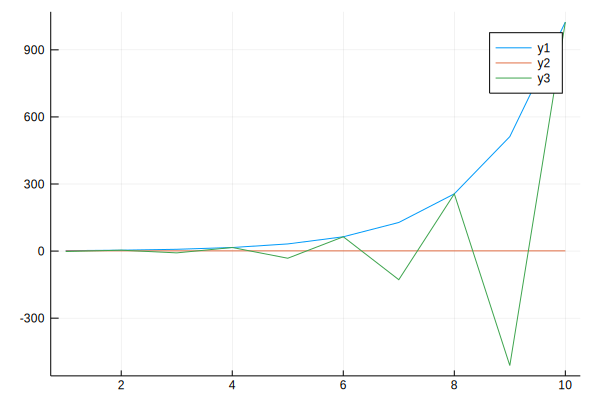

In [26]:
x = 1:10
y1 = 2 .^ x
y2 = 1 .^ x
y3 = (-2) .^ x

plot(x, [y1, y2, y3])

In [162]:
using LinearAlgebra

"""
Compute a difference equation on a discrete signal

Coefficients must be given k...k+n
"""
function diffequation(y, coefs)

    result :: Array{Float64} = []
    order = length(coefs) - 1
        
    
    for i in order + 1 :length(y)
        
        z = dot(coefs, y[i-order:i])
                
        push!(result, z)
    end
    return result
end

coefs = [4, -4, 1, 1]
diffequation(5:15, coefs)

8-element Array{Float64,1}:
 11.0
 13.0
 15.0
 17.0
 19.0
 21.0
 23.0
 25.0

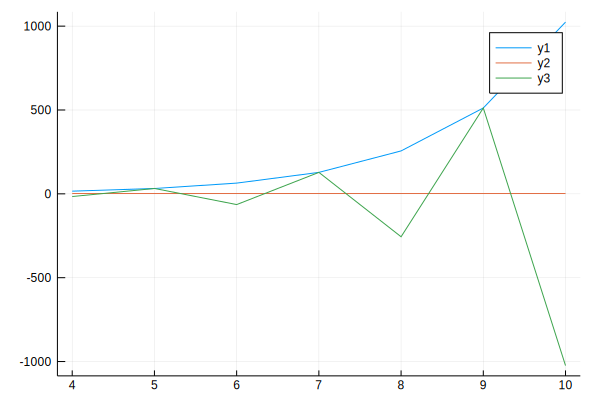

In [163]:
k = 1:10
y1 = 2 .^ k
y2 = 1 .^ k
y3 = (-2) .^ k

x =  diffequation(k, [0,0,0,1])
z1 = diffequation(y1, coefs)
z2 = diffequation(y2, coefs)
z3 = diffequation(y3, coefs)
plot(x, [z1, z2, z3])

In [164]:
cos(pi)

-1.0

### A more interesting signal: cosine

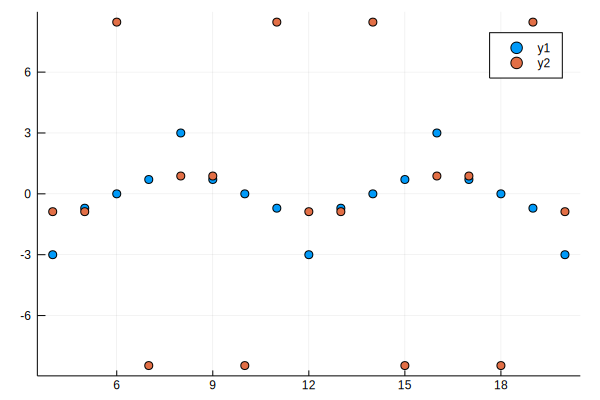

In [166]:
k = 1:20
y1 = map(x -> 2cos(pi*x/4) + cos(3pi * x/4), k)

x =  diffequation(k, [0,0,0,1])
z1 = diffequation(y1, coefs)

scatter(x, [diffequation(y1, [0,0,0,1]), z1])

# Eigenvalues and eigenvectors

Explore linear transformations and their eigenvectors.

In [210]:
function random2Dtransform()
    return rand(-9:9, 2,2)
end

A = random2Dtransform()
X = reshape([-1,1,1,1,-1,-1,1,-1],(2, 4))

2×4 Array{Int64,2}:
 -1  1  -1   1
  1  1  -1  -1

In [22]:
using Plots

In [47]:
AX

2×4 Array{Int64,2}:
 -5  -11  11   5
  1   -7   7  -1

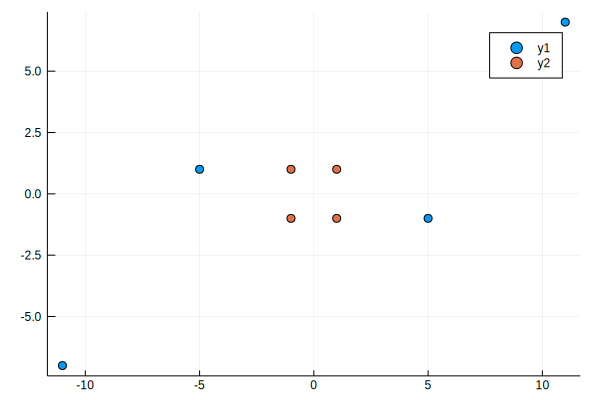

In [51]:
AX = A * X

p = scatter(AX[1, :], AX[2, :])
scatter!(p, X[1, :], X[2, :])

In [60]:
X

2×4 Array{Int64,2}:
 -1  1  -1   1
  1  1  -1  -1

In [64]:
AX

2×4 Array{Int64,2}:
 -5  -11  11   5
  1   -7   7  -1

In [224]:
function drawlineartransform(A, X=reshape([0,1,1,1,0,0,1,0],(2, 4)))

    input = X
    transformed = A * input
    maxx = 0
    maxy = 0
    p = scatter(legend=false)

    # Each partition represents the x and y pairs of a single
    # original point and its transformed
    for (x, y) in Iterators.partition(zip(input, transformed),2)

        # collect because stupid plots doesn't take draw tuples
        xvalues = collect(x)
        yvalues = collect(y)
        
        maxx = maximum((vcat(map(abs, xvalues), maxx)))
        maxy = maximum((vcat(map(abs, yvalues), maxy)))
        
        scatter!(xvalues, yvalues) 
        
        # Line from the origin. TODO: same color as dots
        plot!(vcat(0,xvalues), vcat(0,yvalues))
    end

    maxx+=2
    maxy+=2
    
    scatter!(xlims=(-maxx,maxx), ylims=(-maxy,maxy)) 
    return p
end

drawlineartransform (generic function with 2 methods)

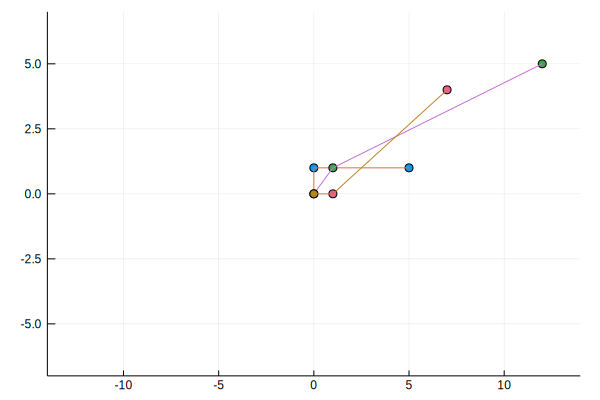

In [225]:
drawlineartransform(A)

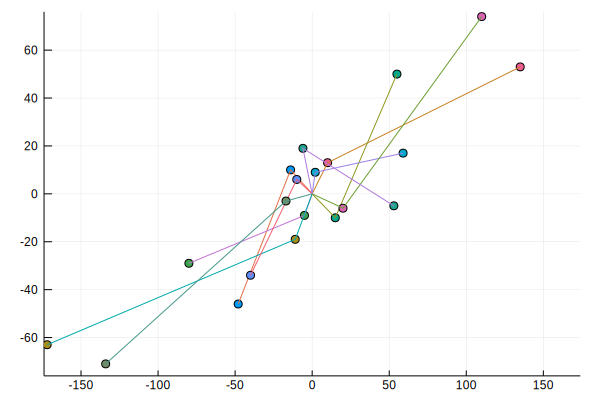

In [226]:
drawlineartransform(A, reshape(rand(-20:20, 20), (2,10)))

In [245]:
function random2Dpoints(n, range=-20:20)
    return reshape(rand(range, 2n), (2,n))
end


random2Dpoints (generic function with 2 methods)

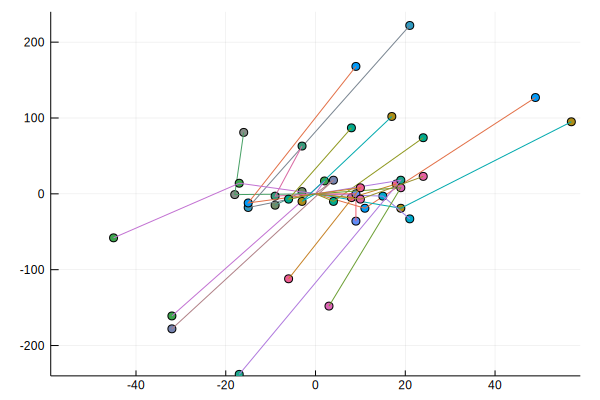

In [246]:
drawlineartransform(random2Dtransform(), random2Dpoints(20))

### Future exercise: animate

Interpolation seems nontrivial, so maybe just do it in 3D and animate the view angle

### Drawing vector fields 

For later reference

https://stackoverflow.com/questions/51466537/how-to-plot-a-vector-field-in-julia

https://discourse.julialang.org/t/anyone-have-a-plots-quiver-example/1369/2